# Training using Keras

## Adding imports

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from google.colab import drive

## Data Loading and Preprocessing

In [3]:
# Mount Google Drive
drive.mount('/content/drive')
# Load your dataset
file_path = '/content/drive/My Drive/synthetic_fitness_data_final_balanced.csv'
data = pd.read_csv(file_path)

Mounted at /content/drive


#### Goals Visualization

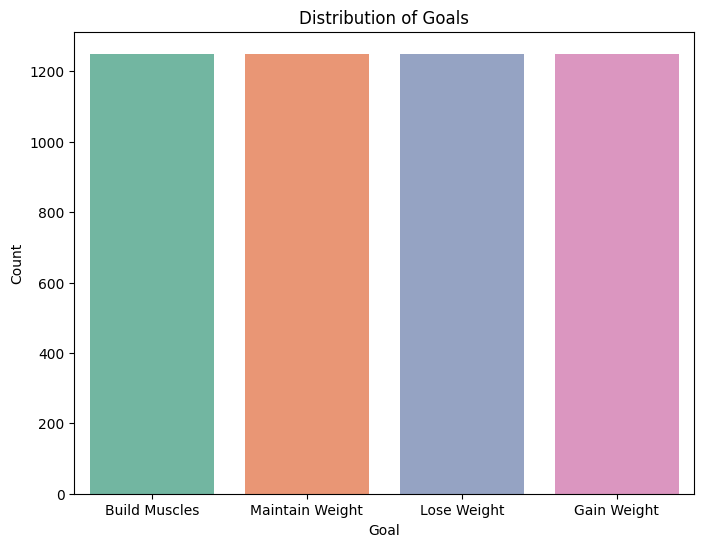

In [4]:
# Visualize the distribution of Goals
plt.figure(figsize=(8,6))
df = pd.DataFrame(data)
sns.countplot(data=df, x='Goal', hue='Goal', palette='Set2', legend=False)
plt.title('Distribution of Goals')
plt.xlabel('Goal')
plt.ylabel('Count')
plt.show()

#### Features Labeling and Encoding

In [5]:
# Features and Labels
X = data.drop(columns=['Goal', 'Workout Recommendation'])  # Drop non-useful columns
y = data['Goal']

# One-Hot Encode the 'Gender' column
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)  # One-hot encode 'Gender'

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Create a DataFrame to display actual and encoded values of 'Goal'
goal_mapping = pd.DataFrame({'Actual Goal': y, 'Encoded Goal': y_encoded})

# Display the unique actual and encoded values
print(goal_mapping.drop_duplicates().reset_index(drop=True))

       Actual Goal  Encoded Goal
0    Build Muscles             0
1  Maintain Weight             3
2      Lose Weight             2
3      Gain Weight             1


#### Train-Test Split

In [6]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Print first 5 records from X_train
print("First 5 records from X_train:")
print(X_train.head())

First 5 records from X_train:
      Age  Weight  Height   BMI  Calories Burned  Workout Time (min)  \
4227   18    45.3   184.5  13.3            23.98                 168   
4676   24    62.0   185.8  18.0            11.77                  72   
800    24    87.2   156.6  35.6             3.25                   2   
3671   43    67.1   164.7  24.8            13.95                  87   
4193   23    66.8   170.4  23.0            34.34                 240   

      Gender_Male  Gender_Other  
4227         True         False  
4676         True         False  
800         False          True  
3671         True         False  
4193         True         False  


#### Data Visualization

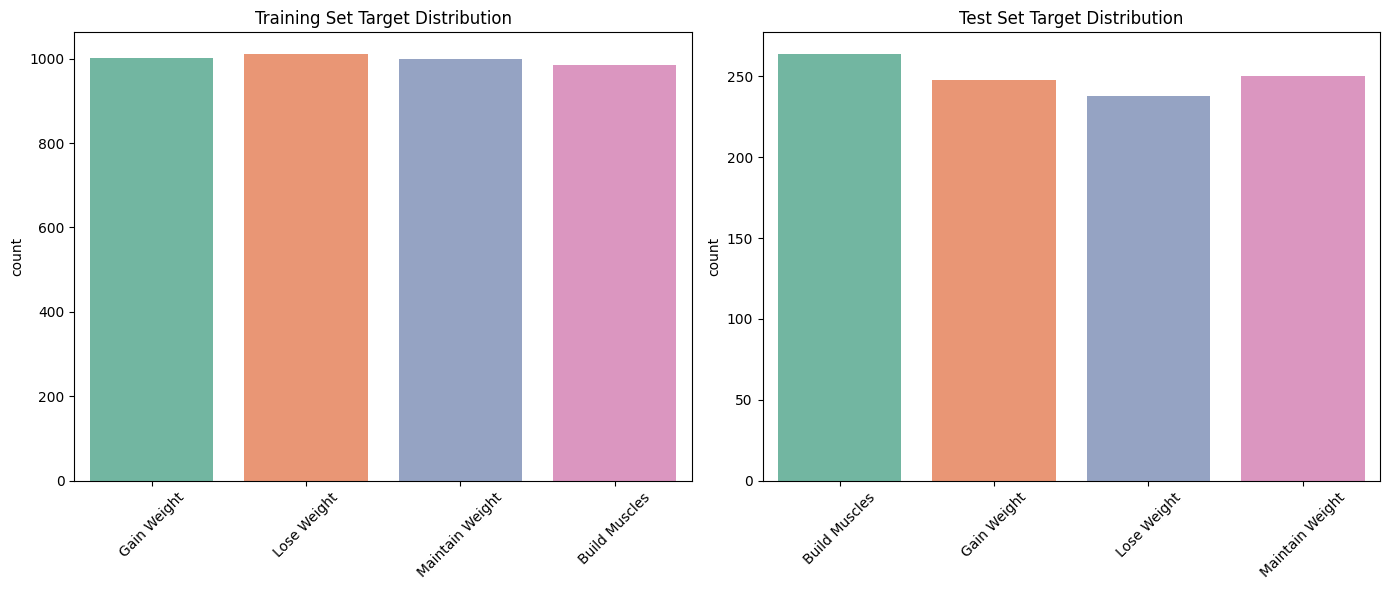

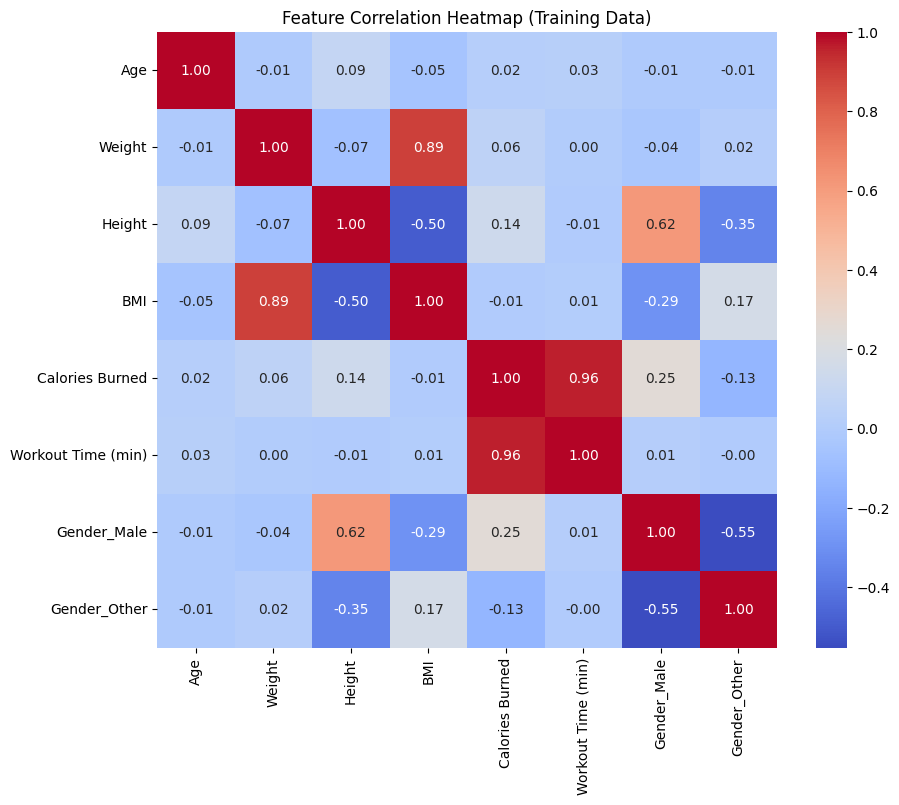

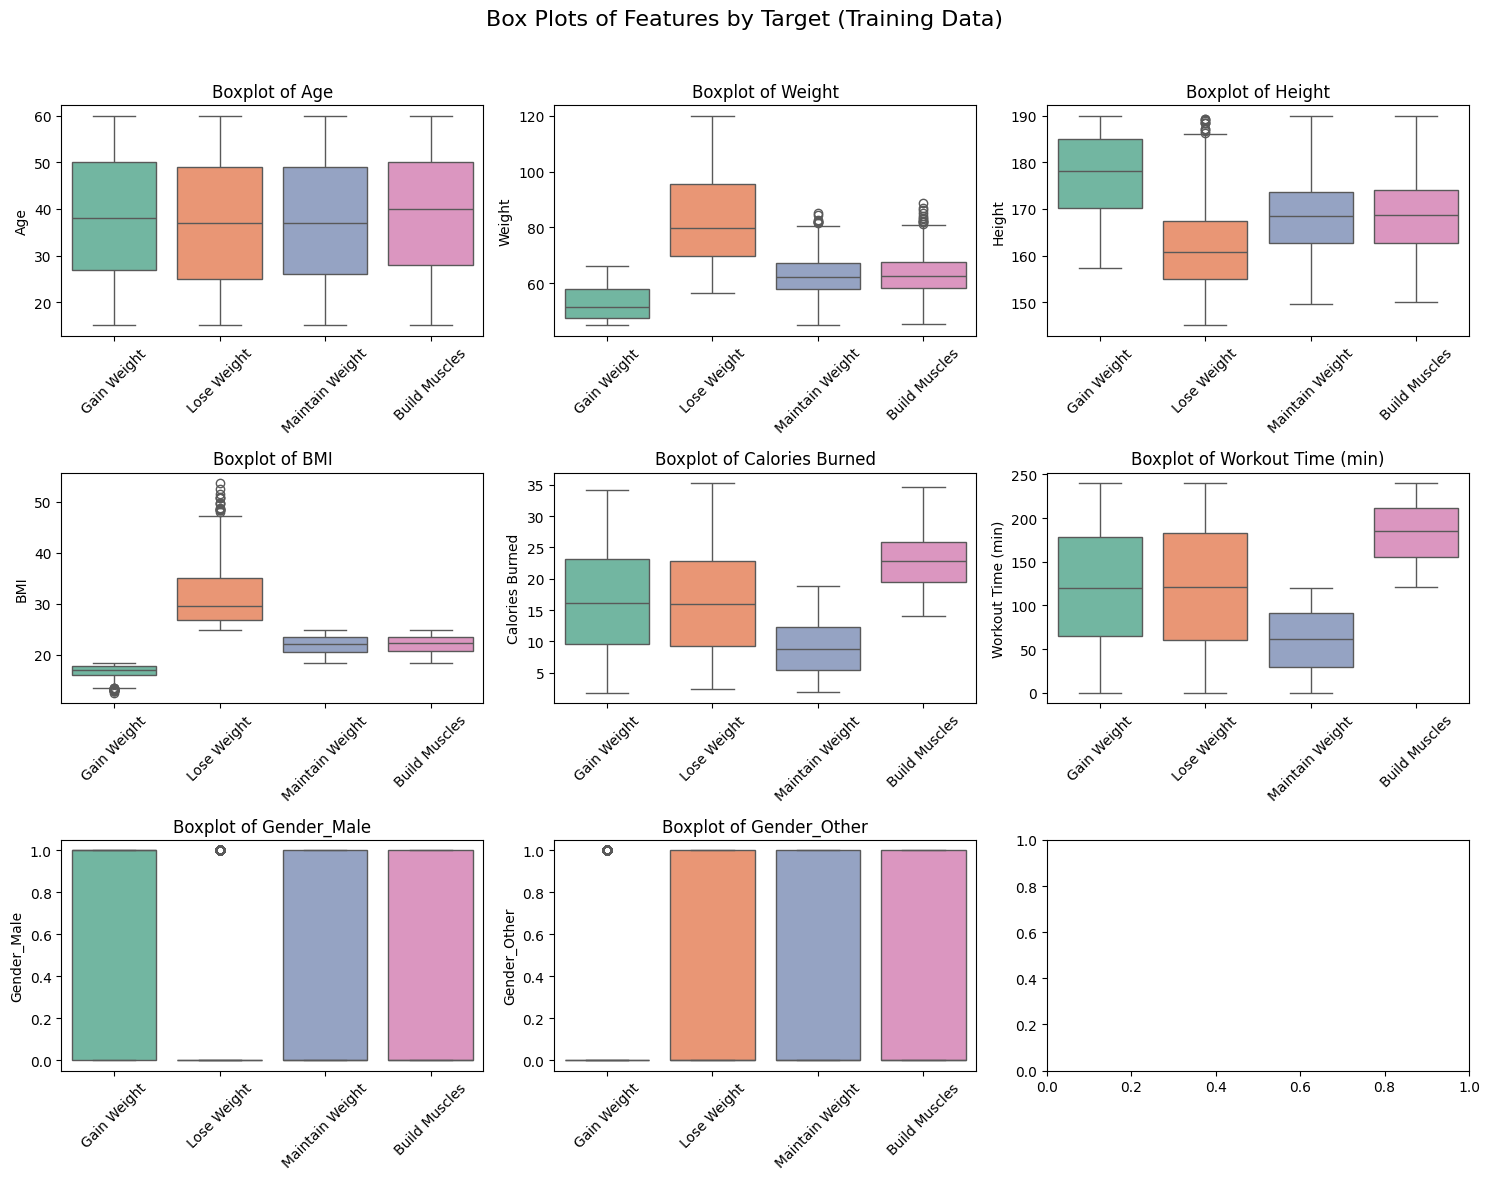

In [7]:
# Converting y back to categorical for easier plotting
y_train_labels = label_encoder.inverse_transform(y_train)
y_test_labels = label_encoder.inverse_transform(y_test)

# Plot 1: Distribution of target labels in training and testing sets
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train_labels, hue=y_train_labels, palette='Set2', legend=False)
plt.title('Training Set Target Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x=y_test_labels, hue=y_test_labels, palette='Set2', legend=False)
plt.title('Test Set Target Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot 2: Correlation Heatmap for the features
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap (Training Data)')
plt.show()

# Plot 3: Box plots for each feature by target
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Box Plots of Features by Target (Training Data)', fontsize=16)

for i, col in enumerate(X_train.columns):
    sns.boxplot(x=y_train_labels, y=X_train[col], palette='Set2', hue=y_train_labels, legend=False, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Boxplot of {col}')
    axes[i // 3, i % 3].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Standardizing Feature Data

In [8]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Compiling and Building Model

In [9]:
# Build the Keras model
input_shape = (X_train.shape[1],)
model = keras.Sequential([
    keras.Input(shape=input_shape), # Define input shape here
    keras.layers.Dense(128, activation='relu'),  # Remove input_shape from here
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training

In [10]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, validation_split=0.2)


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5047 - loss: 1.1294 - val_accuracy: 0.8650 - val_loss: 0.3583
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8243 - loss: 0.4308 - val_accuracy: 0.9137 - val_loss: 0.2412
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8859 - loss: 0.2933 - val_accuracy: 0.9337 - val_loss: 0.1867
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8892 - loss: 0.2849 - val_accuracy: 0.9488 - val_loss: 0.1552
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9028 - loss: 0.2432 - val_accuracy: 0.9588 - val_loss: 0.1369
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9140 - loss: 0.2068 - val_accuracy: 0.9650 - val_loss: 0.1175
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9264 - loss: 0.2033 - val_accuracy: 0.9700 - val_loss: 0.1073
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9475 - loss: 0.1541 - val_accuracy: 0

## Evaluation

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4949 - loss: 209.4621
Test Accuracy: 0.4779999852180481


### Plot History

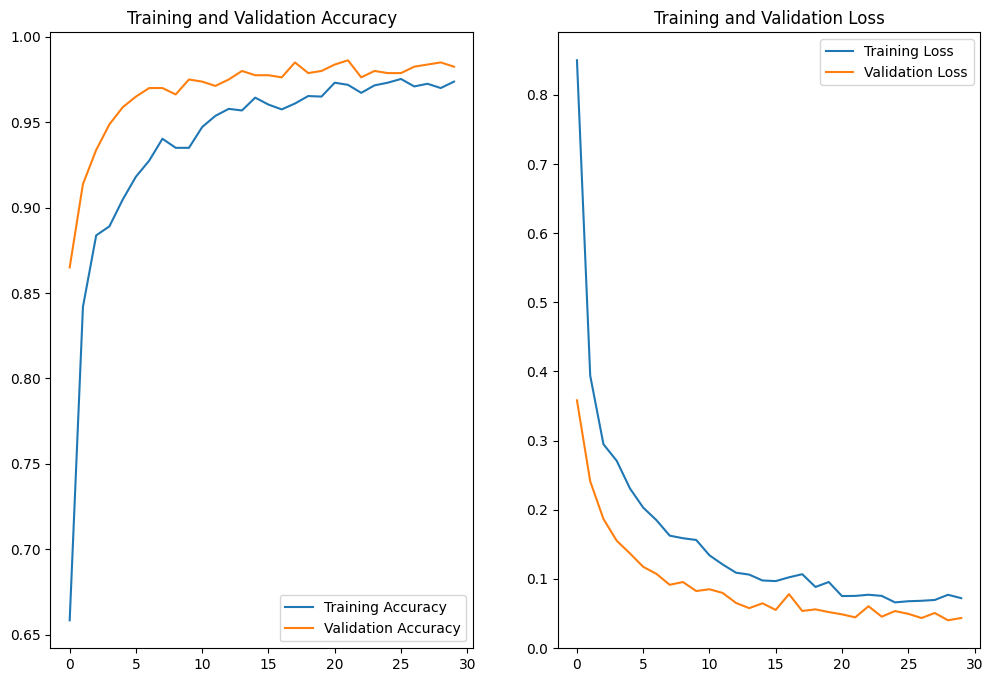

In [12]:
# Plot training and validation loss and accuracy
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)

## Other Metrics

In [13]:
# Evaluate the model and calculate metrics
y_pred_probs = model.predict(X_test_scaled)  # Get predicted probabilities
y_pred = tf.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

precision = precision_score(y_test, y_pred, average='weighted')  # Calculate weighted precision
recall = recall_score(y_test, y_pred, average='weighted')  # Calculate weighted recall
f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate weighted F1-score

print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-score: {f1}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Test Precision: 0.9830855748859192
Test Recall: 0.983
Test F1-score: 0.9829889710754739


### Confusion Matrix

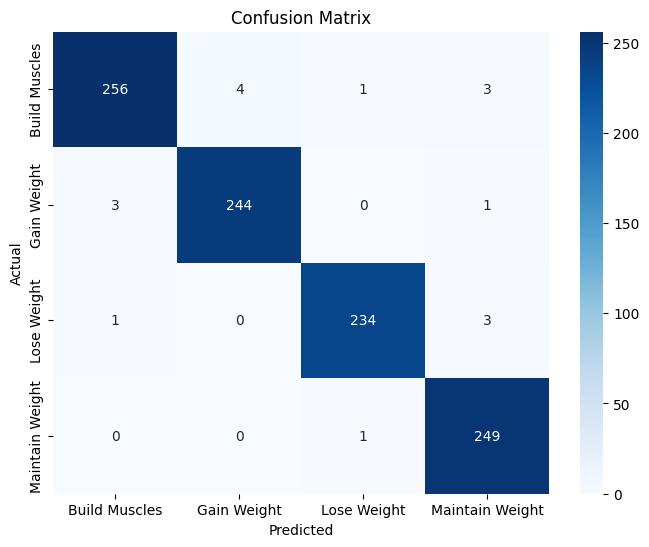

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Testing on an unseen dataset

In [22]:
# Define the custom test data
test_data = pd.DataFrame({
    'Age': [24, 43, 45, 22.809595],
    'Weight': [75, 65.7, 72, 75.0],
    'Height': [162.56, 160, 180, 162.56],
    'BMI': [25, 25.2, 22.2, 28.381405],
    'Calories Burned': [25, 24.43, 30, 1571.5957],
    'Workout Time (min)': [30, 166, 45, 0.93333334],
    'Gender_Male': [1, 1, 1, 1.0],
    'Gender_Other': [0, 0, 0, 0]
})
# [22.809595, 75.0, 162.56, 28.381405, 1571.5957, 0.93333334, 1.0, 0.0]

# Standardize the test data using the same scaler as training
test_data_scaled = scaler.transform(test_data)

# Make predictions
predictions = model.predict(test_data_scaled)
print(f"Predictions: {predictions}")


predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))


for i, label in enumerate(predicted_labels):
    print(f"Custom data point {i+1}: Predicted Goal -> {label}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predictions: [[7.2054554e-08 5.6150432e-11 9.9983072e-01 1.6909796e-04]
 [6.8993457e-02 1.9259647e-07 9.3098903e-01 1.7352049e-05]
 [1.9624095e-01 9.4401776e-06 3.2735459e-04 8.0342215e-01]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
Custom data point 1: Predicted Goal -> Lose Weight
Custom data point 2: Predicted Goal -> Lose Weight
Custom data point 3: Predicted Goal -> Maintain Weight
Custom data point 4: Predicted Goal -> Build Muscles


## Exporting to tflite

In [16]:
# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to file
with open('fitness_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TFLite model exported successfully!")

Saved artifact at '/tmp/tmp4_51ikcr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  136907723474368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136907723317216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136907723390144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136907720646272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136907720647152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136907720803776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136907720803600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136907720806768: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model exported successfully!


## Dumping Scalar Params

In [19]:
import json
import numpy as np

# Save scaler parameters
scaler_params = {
    'mean': scaler.mean_.tolist(),  # Convert NumPy array to list
    'scale': scaler.scale_.tolist()  # Convert NumPy array to list
}
with open('scaler_params.json', 'w') as f:
    json.dump(scaler_params, f)


## Dumping labels

In [20]:
# Save labels
import json
labels = list(label_encoder.classes_)
with open('labels.json', 'w') as f:
    json.dump(labels, f)
